# Fully Connected Neural Network

"Artificial neural networks (ANN) are computing systems vaguely inspired by the biological neural networks that constitute animal brains." [[link](https://en.wikipedia.org/wiki/Artificial_neural_network)]

![Fully Connected Neural Network](https://raw.githubusercontent.com/previtus/cci_exploring_machine_intelligence/master/week02_basic-building-blocks/ml02_fully_connected_neural_network_illustration.png)



# Starter code

imports:

In [0]:
# Imports for the libraries we will use ...
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
# Load the dataset and explore it:

# MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

# Flattening the data!
#  28x28 -> 784
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# One hot vector encoding:
# "label 0" -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# "label 1" -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ... etc!
# "label 9" -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Let's look at the data:

# Training set
print("Training set:")
print('x (image data) =', x_train.shape)
print('y (labels data) =', y_train.shape)


In [0]:
def show_image(image, label):
    print ('Label:', label)
    print ('Digit in the image', np.argmax(label))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

i = 0 # select one of the 60000 images!
show_image(x_train[i], y_train[i])

We will use Keras to create a simple model here!


In [0]:
# Fully Connected Neural Network MODEL
from keras.layers import Dense

model = keras.models.Sequential()

In [0]:
# function to add a new layer:
# - model.add( ... )

# create one layer full of 300 neurons
# - Dense(300)

In [0]:
# first layer with 300 neurons
model.add(Dense(300, activation='relu', input_shape=(784,)))

In [0]:
# second layer with 100 neurons
model.add(Dense(100, activation='relu'))

In [0]:
# final layer with 10 neurons
model.add(Dense(num_classes, activation='softmax')) 

# softmax is function which will make all the outputs sum to 1 (then they are better fitted with one-hot vectors)

In [0]:
model.summary()

In [0]:
# PS: another helpful function:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

Training the model

In [0]:
# First set it up with compile (we select the optimizer functions etc)
#   - SGD is Stochastic Gradient Descent = something similar to what we saw in the slides ...

#model.compile( ... )

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(), # RMSprop()
              metrics=['accuracy'])

In [0]:
# This will train the model with all data for one iteration:

# model.fit( ... )
# We simply can:
model.fit(x_train, y_train)

# Or to repeat it several times with some validation data:
#history = model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

In [0]:
# What about the results?
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
# PS: For plotting we can also look at the history of the training process:
# print(history.history)

Let's now use the model!

In [0]:
i = 22 # 22 has 6, 1033 has messy 8
image = x_test[i]
correct_label = y_test[i]
show_image(image, correct_label)

input_in_list = np.asarray([image])
prediction = model.predict(input_in_list)

print("We predicted:", prediction[0])
for class_number, number_prediction in enumerate(prediction[0]):
    print(class_number, "=>", np.round(number_prediction, 2))

# Solution code

imports:

In [0]:
# Imports for the libraries we will use ...
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

## Loading and inspecting the MNIST dataset

In [0]:
# MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

# Flattening the data!
#  28x28 -> 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# One hot vector encoding:
# "label 0" -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# "label 1" -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ... etc!
# "label 9" -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


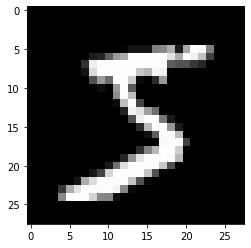

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


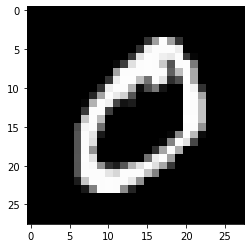

In [0]:
%matplotlib inline
images = x_train[0:2]
labels = y_train[0:2]
for index, image in enumerate(images):
    print ('Label:', labels[index])
    print ('Digit in the image', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

## Creating and training the model

In [0]:
# Fully Connected Neural Network MODEL

model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the model:
batch_size = 128
epochs = 20

# First setup few things (like which function will be used for optimization)
# ps: some of these are not the best - but they were chosen for illustration to match what we studied about.
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(), # RMSprop()
              metrics=['accuracy'])

# And then start up the training:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.0469 - accuracy: 0.7484 - val_loss: 0.5109 - val_accuracy: 0.8753
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4443 - accuracy: 0.8837 - val_loss: 0.3700 - val_accuracy: 0.9000
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3579 - accuracy: 0.9010 - val_loss: 0.3189 - val_accuracy: 0.9120
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.3175 - accuracy: 0.9108 - val_loss: 0.2912 - val_accuracy: 0.9188
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2911 - accuracy: 0.9182 - val_loss: 0.2695 - val_accuracy: 0.9267
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2710 - accuracy: 0.9230 - val_loss: 0.2542 - val_accuracy: 0.9302
Epoch 7/20
60000/60000 [==============================] - 3s 47us/st

Plot:


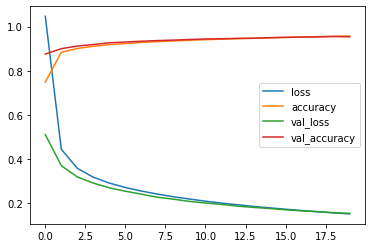

In [0]:
# Great! ... Wait ... so what happened?

# Here we can visualize the progess of the error (loss) going down and the accuracy going up!

loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

epochs_array = list(range(epochs))
plt.plot(epochs_array, loss, label="loss")
plt.plot(epochs_array, accuracy, label="accuracy")
plt.plot(epochs_array, val_loss, label="val_loss")
plt.plot(epochs_array, val_accuracy, label="val_accuracy")
plt.legend()

print("Plot:")